# Fifa Moneyball Project
##### Author: Diego Plaza
##### Date: May 2022

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
url = "./src/data/fifa21_male2.csv"
df = pd.read_csv(url, low_memory=False)


## Data Cleaning

In [4]:
df.head(5)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


### To decrease complexity we'll standardize column names

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df = df.set_index("id")
df.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [7]:
df.head(5)

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [8]:
df.shape

(17125, 106)

In [9]:
nan_columns = [_column for _column in df.columns if df[_column].isna().sum() or df[_column].empty > 0]
qty_nan_per_nan_columns = df[nan_columns].isna().sum()
columns_type = df[nan_columns].dtypes
nan_df = pd.concat([qty_nan_per_nan_columns, columns_type], axis=1)
nan_df.columns = ["nan_qty", "dtype"]
nan_df

,nan_qty,dtype
club,23,object
position,413,object
club_logo,23,object
joined,58,object
loan_date_end,16215,object
volleys,58,float64
curve,58,float64
agility,58,float64
balance,58,float64
jumping,58,float64


In [10]:
columns_outside_scope = [
    'player_photo',
    'club_logo',
    'flag_photo',
    'gender',
    'joined',
    'team_&_contract',
    'loan_date_end',
    'name'
]

df.drop(columns_outside_scope, inplace=True ,axis=1)

df.head(5)

,age,ova,nationality,club,bov,bp,position,pot,height,weight,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,Italy,Udinese,71,LWB,LM,69,"6'0""",181lbs,...,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
16,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,"5'10""",143lbs,...,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
27,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,"5'9""",161lbs,...,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
36,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,"5'11""",165lbs,...,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
41,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,"5'7""",150lbs,...,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3


In [11]:
def contract_interval (x):
    try:
        if "On Loan" in x:
            x = int(x.split(", ")[1].split(" On Loan")[0])
        elif " ~ " in x:
            x = int(x.split(" ~ ")[1])
        else:
            x = 0
    except:
        raise
    finally:
        return x

# international units
def height_to_cm(el):
    el_list = el.split('"')[0].split("'")
    return round(float(int(el_list[0])*12 + int(el_list[1])) * 2.54, 0)

def weight_to_kg(el):
    return round(float(el.split("lbs")[0]) / 2.2, 0)

def macro_positions(_p):
    for k, v in POSITIONS_DICT.items():
        if _p in v:
            return k

def qty_possible_positions(positions):
    positions = str(positions)
    p_list = positions.split(" ")
    if type(p_list) == list:
        return len(p_list)

UNITS_DICT = {"M": 1000000, "K":1000}
def currency_to_magnitude(currency):
    currency = currency.replace("€", "")
    for k, v in UNITS_DICT.items():
        if k in currency:
            return float(currency.replace(k, "")) * v
    return float(currency)

POSITIONS_DICT = {}
DEFENSIVE_POSITIONS = []
MIDFIELDER_POSITIONS = []
ATTACKING_POSITIONS = []
for p in df["bp"].unique():
    if "B" in p or "K" in p:
        DEFENSIVE_POSITIONS.append(p)
    elif "M" in p:
        MIDFIELDER_POSITIONS.append(p)
    else: 
        ATTACKING_POSITIONS.append(p)
POSITIONS_DICT["D"] = DEFENSIVE_POSITIONS
POSITIONS_DICT["M"] = MIDFIELDER_POSITIONS
POSITIONS_DICT["A"] = ATTACKING_POSITIONS

In [12]:
# Active players from the season in question 2020-2021
# df.contract_end = df["contract"].apply(contract_interval).apply(lambda x: int(x) >= 2021) # todo add column with the fina
df["contract_end"] = df["contract"].apply(contract_interval).apply(lambda x: x if x >= 2020 else False)
df.drop(["contract"], axis = 1, inplace=True)

In [13]:
# we'll only keep those players who have an active status for the current season
df = df[df["contract_end"] != False]
df["contract_end"] = df["contract_end"].apply(lambda x: int(x))

In [14]:
# changing values in dataframe to international standard
df["height"] = df["height"].apply(height_to_cm)
df["weight"] = df["weight"].apply(weight_to_kg)
# checking
# df[["height", "weight"]].head()


In [15]:
df["bp"] = df["bp"].apply(macro_positions)

In [16]:
df["position"] = df["position"].apply(qty_possible_positions)

In [17]:
df.rename(columns={'position': 'pos_variants'}, inplace=True)

In [18]:
df[["bp", "pos_variants"]]

,bp,pos_variants
id,,
27,M,4
41,M,2
80,M,2
330,A,1
1179,D,1
...,...,...
259088,D,1
259090,M,2
259091,D,1


In [19]:
df[["value", "wage", "release_clause"]] = df[["value", "wage", "release_clause"]].applymap(currency_to_magnitude)

In [20]:
players = df[[
    "age",
    "ova",
    "nationality",
    "club",
    "bp",
    "pos_variants",
    "height",
    "weight",
    "foot",
    "growth",
    "value",
    "wage",
    "contract_end"
]]

## Data Cleaning

In [21]:
players.info(verbose=True, show_counts=True)
players

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15933 entries, 27 to 259105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           15933 non-null  int64  
 1   ova           15933 non-null  int64  
 2   nationality   15933 non-null  object 
 3   club          15933 non-null  object 
 4   bp            15933 non-null  object 
 5   pos_variants  15933 non-null  int64  
 6   height        15933 non-null  float64
 7   weight        15933 non-null  float64
 8   foot          15933 non-null  object 
 9   growth        15933 non-null  int64  
 10  value         15933 non-null  float64
 11  wage          15933 non-null  float64
 12  contract_end  15933 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


,age,ova,nationality,club,bp,pos_variants,height,weight,foot,growth,value,wage,contract_end
id,,,,,,,,,,,,,
27,33,71,England,Coventry City,M,4,175.0,73.0,Right,0,1100000.0,15000.0,2020
41,36,81,Spain,Vissel Kobe,M,2,170.0,68.0,Right,0,5500000.0,12000.0,2021
80,38,77,Turkey,Fenerbahçe SK,M,2,170.0,72.0,Left,0,2800000.0,44000.0,2020
330,35,80,Republic of Ireland,LA Galaxy,A,1,175.0,73.0,Right,0,5500000.0,10000.0,2022
1179,42,82,Italy,Juventus,D,1,193.0,92.0,Right,0,2200000.0,41000.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,France,CD Tondela,D,1,198.0,75.0,Right,5,550000.0,2000.0,2021
259090,18,56,Wales,Burnley,M,2,178.0,77.0,Right,10,130000.0,3000.0,2021
259091,18,56,England,Burnley,D,1,175.0,70.0,Right,11,130000.0,2000.0,2022


<AxesSubplot:ylabel='id'>

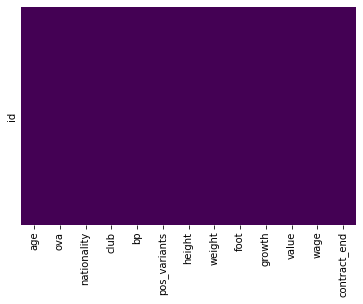

In [22]:
sns.heatmap(players.isnull(), yticklabels=False, cbar=False, cmap="viridis")


<AxesSubplot:xlabel='foot', ylabel='count'>

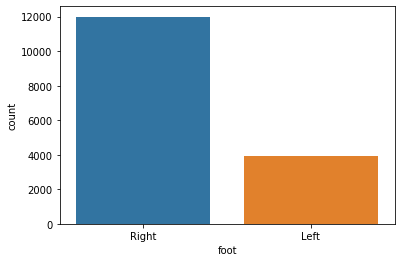

In [23]:
sns.countplot(x="foot", data=players)


<AxesSubplot:xlabel='bp', ylabel='count'>

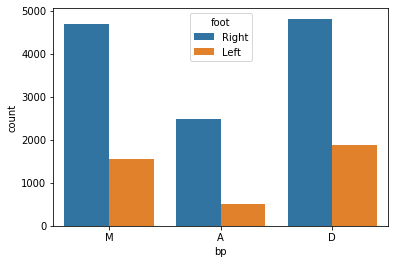

In [24]:
sns.countplot(x="bp", hue="foot" ,data=players)

## EDA

In [25]:
import cufflinks as cf
cf.go_offline()
players["age"].iplot(kind="hist" ,bins=20)

<AxesSubplot:xlabel='bp', ylabel='age'>

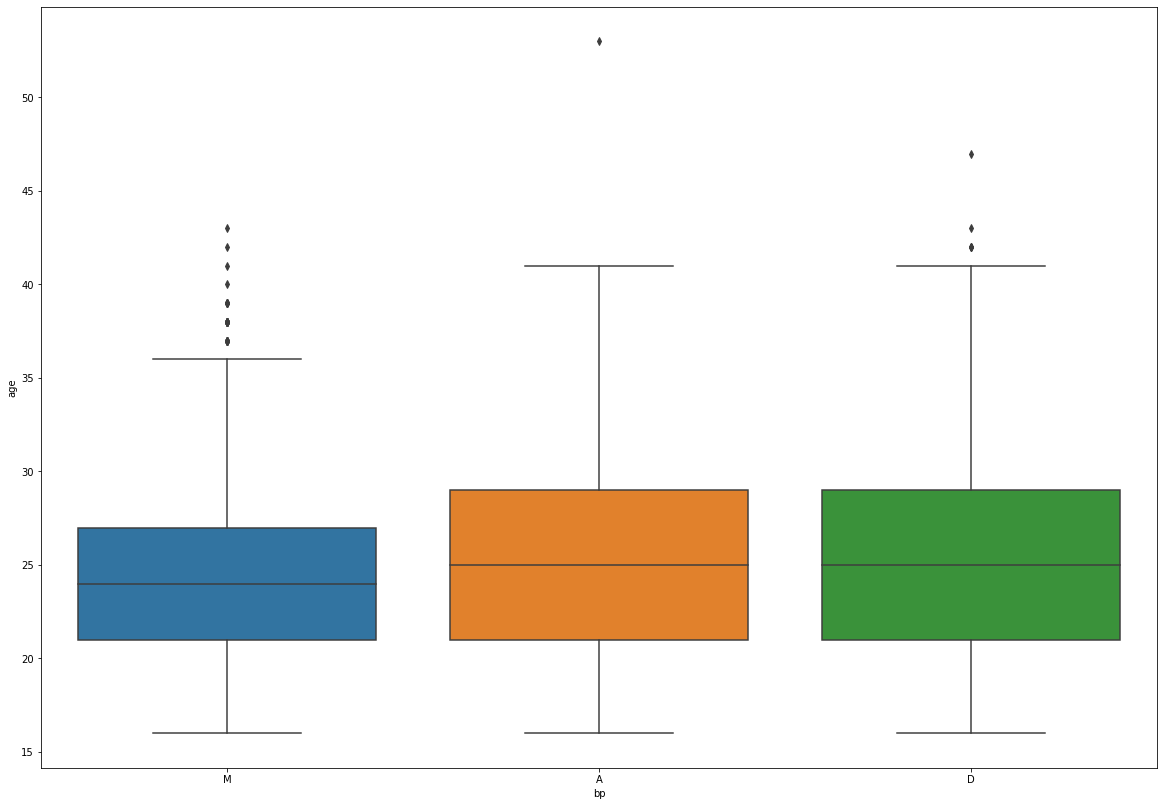

In [26]:
plt.figure(figsize=(20,14))
sns.boxplot(data=players, x="bp", y="age")

In [27]:
position = pd.get_dummies(players["bp"], drop_first=True)
foot = pd.get_dummies(players["foot"], drop_first=True)
players = pd.concat ([players, position, foot], axis=1)

In [28]:
players.drop(["bp", "foot"], inplace=True, axis=1)

<AxesSubplot:>

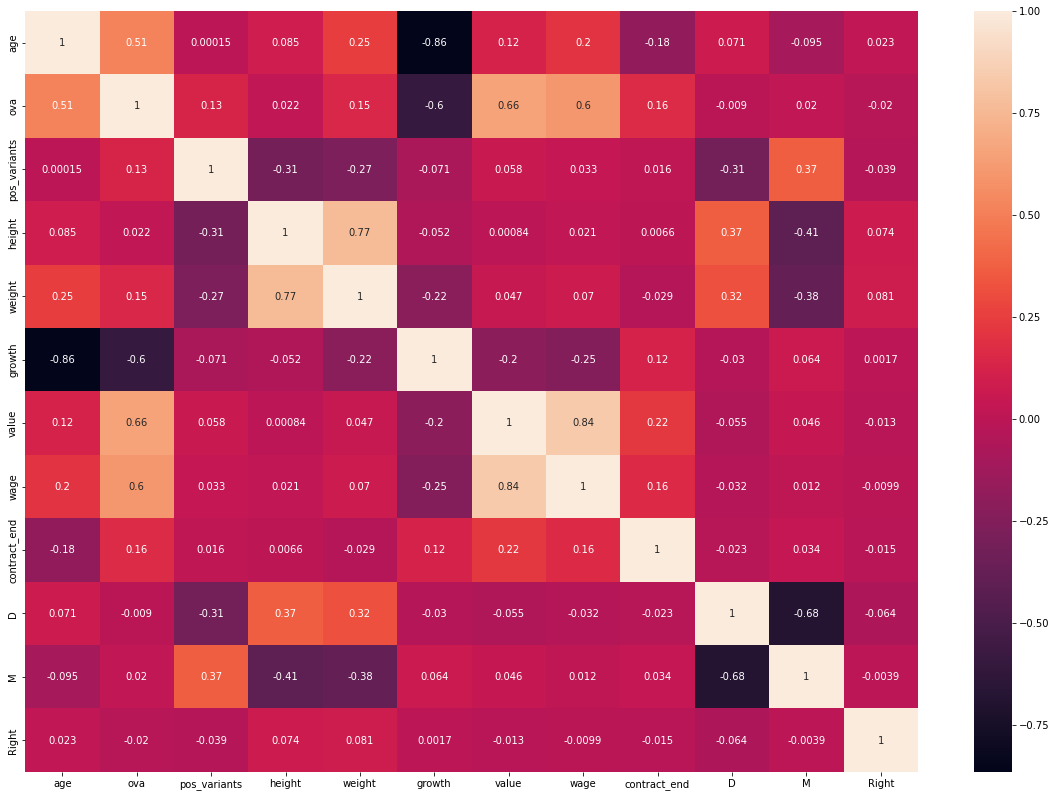

In [29]:
plt.figure(figsize=(20,14))
sns.heatmap(players.corr(), annot= True)

In [30]:
clubs = players.groupby(by="club")

### Who were the players with the greatest **"Overall Rating" (OVA)** score in 2021?

In [31]:
players.sort_values(by="ova", ascending=False).head(5)

,age,ova,nationality,club,pos_variants,height,weight,growth,value,wage,contract_end,D,M,Right
id,,,,,,,,,,,,,,
158023,33,93,Argentina,FC Barcelona,3,170.0,72.0,0,67500000.0,560000.0,2021,0,0,0
20801,35,92,Portugal,Juventus,2,188.0,83.0,0,46000000.0,220000.0,2022,0,0,1
200389,27,91,Slovenia,Atlético Madrid,1,188.0,87.0,2,75000000.0,125000.0,2023,1,0,1
192985,29,91,Belgium,Manchester City,2,180.0,70.0,0,87000000.0,370000.0,2023,0,1,1
190871,28,91,Brazil,Paris Saint-Germain,2,175.0,68.0,0,90000000.0,270000.0,2022,0,0,1


### Which clubs had the best ***"Overal Rating" (OVA)*** score in 2021, based on its players ***OVA***?

In [32]:
clubs[["ova", "value"]].sum().sort_values(by="ova", ascending=False).head(5)


,ova,value
club,,
Chelsea,3215,611285000.0
AS Monaco,3092,245200000.0
Tottenham Hotspur,3043,576025000.0
Everton,2982,329790000.0
Liverpool,2971,852110000.0


## Model

In [33]:
players.drop(["club", "nationality"], axis=1, inplace=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import scipy.stats as stats

# STEP 1: REMOVE THE OUTLIERS (OPTIONAL)

# STEP 2: SPLIT THE DATA
def split_dataset(df, target_result, test_size=0.3, random_state=42):
    y = df[target_result]
    X = df.drop(target_result, axis=1)
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# todo
# STEP 2.1: SCALE THE DATA (ONLY X_train & X_test) 

# STEP 2.2: ENCODE THE DATA ()

X_train, X_test, y_train, y_test = split_dataset(players, target_result="ova")

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
predictions = model.predict(X_test)

In [37]:
predictions.shape

(4780,)

In [40]:
predictions

array([67.93464729, 63.73937278, 71.72924237, ..., 72.61223736,
       66.5992195 , 61.93152565])

In [41]:
y_test

id
221433    70
244446    52
188337    72
233880    63
244706    70
          ..
226415    63
251305    54
212442    78
228151    71
231663    62
Name: ova, Length: 4780, dtype: int64

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
print(
    r2_score(y_test, predictions),
    mean_squared_error(y_test, predictions, squared=False),
    mean_squared_error(y_test, predictions)
)

# need to improve the model

0.6931639803114922 3.735097285324746 13.950951730840288
